In [0]:
import re 

In [0]:
def remove_unwanted_commas(file_path, delimiter):
    rdd = sc.textFile(file_path).map(lambda line: re.sub(',(?=[^"]*"[^"]*(?:"[^"]*"[^"]*)*$)',";",line))\
    .map(lambda x: x.split(delimiter))
    return rdd 

clin_2021 = remove_unwanted_commas('/FileStore/tables/clinicaltrial_2021.csv', ',')
clin_2021.take(100)

Out[2]: [['"id"',
  '"sponsor"',
  '"status"',
  '"start"',
  '"completion"',
  '"type"',
  '"submission"',
  '"conditions"',
  '"interventions"'],
 ['"NCT02758028"',
  '"The University of Hong Kong"',
  '"Recruiting"',
  '"Aug 2005"',
  '"Nov 2021"',
  '"Interventional"',
  '"Apr 2016"',
  '""',
  '""'],
 ['"NCT02751957"',
  '"Duke University"',
  '"Completed"',
  '"Jul 2016"',
  '"Jul 2020"',
  '"Interventional"',
  '"Apr 2016"',
  '"Autistic Disorder;Autism Spectrum Disorder"',
  '""'],
 ['"NCT02758483"',
  '"Universidade Federal do Rio de Janeiro"',
  '"Completed"',
  '"Mar 2017"',
  '"Jan 2018"',
  '"Interventional"',
  '"Apr 2016"',
  '"Diabetes Mellitus"',
  '""'],
 ['"NCT02759848"',
  '"Istanbul Medeniyet University"',
  '"Completed"',
  '"Jan 2012"',
  '"Dec 2014"',
  '"Observational"',
  '"May 2016"',
  '"Tuberculosis;Lung Diseases;Pulmonary Disease"',
  '""'],
 ['"NCT02758860"',
  '"University of Roma La Sapienza"',
  '"Active; not recruiting"',
  '"Jun 2016"',
  '"Sep 2020"

persist isn't necessary from a recomputational price point as we are using the community edition of Databricks for this assignment, however, if we were querying the data through AWS or any other pay by computation service then persist would be the best option.

In [0]:
def remove_header(rdd):
    #split data on | and remove header
    header = rdd.first() #get new rdd with first row as header
    filtered_rdd = rdd.filter(lambda line: line != header)
    return filtered_rdd
    
filtered_rdd = remove_header(clin_2021)
filtered_rdd.persist()

Out[3]: PythonRDD[548] at RDD at PythonRDD.scala:58

Question 1

In [0]:
over_1 = filtered_rdd.map(lambda x: x[0]).map(lambda word: (word, 1))\
    .reduceByKey(lambda v1, v2: v1+v2).sortBy(lambda x:x[1], ascending=False)

over_1.take(100)

Out[4]: [('"NCT02751957"', 1),
 ('"NCT02757209"', 1),
 ('"NCT02752438"', 1),
 ('"NCT02753543"', 1),
 ('"NCT02753530"', 1),
 ('"NCT02754817"', 1),
 ('"NCT02759276"', 1),
 ('"NCT02755701"', 1),
 ('"NCT02755298"', 1),
 ('"NCT02759614"', 1),
 ('"NCT02757131"', 1),
 ('"NCT02758704"', 1),
 ('"NCT02759913"', 1),
 ('"NCT02758444"', 1),
 ('"NCT02758067"', 1),
 ('"NCT02759341"', 1),
 ('"NCT02752490"', 1),
 ('"NCT02755207"', 1),
 ('"NCT02759900"', 1),
 ('"NCT02752581"', 1),
 ('"NCT02759796"', 1),
 ('"NCT02754063"', 1),
 ('"NCT02751528"', 1),
 ('"NCT02757833"', 1),
 ('"NCT02750761"', 1),
 ('"NCT02752594"', 1),
 ('"NCT02753452"', 1),
 ('"NCT02752763"', 1),
 ('"NCT02751294"', 1),
 ('"NCT02756429"', 1),
 ('"NCT02750891"', 1),
 ('"NCT02753114"', 1),
 ('"NCT02754713"', 1),
 ('"NCT02755129"', 1),
 ('"NCT02754674"', 1),
 ('"NCT02757521"', 1),
 ('"NCT02752451"', 1),
 ('"NCT02757599"', 1),
 ('"NCT02757638"', 1),
 ('"NCT02751489"', 1),
 ('"NCT02759315"', 1),
 ('"NCT02754895"', 1),
 ('"NCT02758002"', 1),
 ('

In [0]:
print("There are" + ' ' + str(filtered_rdd.count()) + ' ' + 'studies in the data')

There are 387261 studies in the data


Question2

In [0]:
def number_of_studies(rdd): 
    new_rdd = rdd.map(lambda x: x[5]).map(lambda x: x.strip('"')).map(lambda word: (word, 1))\
    .reduceByKey(lambda v1, v2: v1+v2).sortBy(lambda x:x[1], ascending=False)
    return new_rdd.collect()

number_of_studies(filtered_rdd)

Out[6]: [('Interventional', 301472),
 ('Observational', 77540),
 ('Observational [Patient Registry]', 8180),
 ('Expanded Access', 69)]

Question 3

In [0]:
def top_5_conditons(rdd):
    top_5 = rdd.map(lambda x: x[7]).flatMap(lambda x: x.split(';')).map(lambda x: x.strip('"'))\
    .map(lambda word: (word, 1)).reduceByKey(lambda v1, v2: v1+v2).filter(lambda x: x[0]!= '')\
    .sortBy(lambda x:x[1], ascending=False)
    
    return top_5.take(5)
    
top_5_conditons(filtered_rdd)    


Out[7]: [('Carcinoma', 13389),
 ('Diabetes Mellitus', 11080),
 ('Neoplasms', 9371),
 ('Breast Neoplasms', 8640),
 ('Syndrome', 8032)]

Question 4

In [0]:
pharma_rdd = sc.textFile('/FileStore/tables/pharma.csv')

mesh_rdd = sc.textFile('/FileStore/tables/mesh.csv')

In [0]:

pre_pharma = pharma_rdd.map(lambda line: re.sub(',(?=[^"]*"[^"]*(?:"[^"]*"[^"]*)*$)',"",line))
pre_mesh = mesh_rdd.map(lambda line: re.sub(',(?=[^"]*"[^"]*(?:"[^"]*"[^"]*)*$)',"",line))  

pre_pharma = remove_header(pre_pharma)
pre_mesh = remove_header(pre_mesh)

In [0]:
pre_mesh.take(100)

Out[10]: ['"Right Paraduodenal Hernia","C23.300.707.960.750"',
 '"Left Paraduodenal Hernia","C23.300.707.960.750"',
 '"Mast Cell Stabilizers","D27.505.696.477.914"',
 '"Mast Cell Stabilizers","D27.505.954.158.636"',
 '"Diagnostic Reference Levels","E05.799.513.250"',
 '"Diagnostic Reference Levels","E05.978.808.125"',
 '"Diagnostic Reference Levels","N06.850.810.250.090"',
 '"Clonal Hematopoiesis","G04.152.825.207"',
 '"Clonal Hematopoiesis","G04.375.500"',
 '"Clonal Hematopoiesis","G05.158.500"',
 '"Clonal Hematopoiesis","G09.188.343.207"',
 '"Age-related Clonal Hematopoiesis","G04.152.825.207"',
 '"Age-related Clonal Hematopoiesis","G04.375.500"',
 '"Age-related Clonal Hematopoiesis","G05.158.500"',
 '"Age-related Clonal Hematopoiesis","G09.188.343.207"',
 '"CHIP Clonal Hematopoiesis of Indeterminate Potential","G04.152.825.207"',
 '"CHIP Clonal Hematopoiesis of Indeterminate Potential","G04.375.500"',
 '"CHIP Clonal Hematopoiesis of Indeterminate Potential","G05.158.500"',
 '"CHIP C

In [0]:
mesh_rdd2 = pre_mesh.map(lambda x: x.split(',')).map(lambda x: (x[0].strip('"'), x[1].strip('"'))) \
.map(lambda x: [x[0], x[-1].split('.')[0]]) \
.groupByKey().map(lambda x: (x[0], list(x[1])))

mesh_rdd2.take(100)

Out[11]: [('Left Paraduodenal Hernia', ['C23']),
 ('Mast Cell Stabilizers', ['D27', 'D27']),
 ('CHIP Clonal Hematopoiesis of Indeterminate Potential',
  ['G04', 'G04', 'G05', 'G09']),
 ('Digital Technology', ['H01', 'J01']),
 ('Kimura Disease', ['C07', 'C15']),
 ('Food Security', ['J01']),
 ('Psychotherapists', ['M01']),
 ('Social Media Addiction', ['F01']),
 ('Internet Gaming Disorder', ['F01']),
 ('Plant Antibiosis', ['G15']),
 ('Sanitary Surveys', ['E05', 'N06', 'N06']),
 ('Workhouses', ['I01', 'J03']),
 ('Poorhouses', ['I01', 'J03']),
 ('Elevated Plus Maze Test', ['F02']),
 ('Preoperative Exercise', ['E02', 'E04', 'G11', 'I03', 'N02']),
 ('Caldicellulosiruptor', ['B03']),
 ('Cerebral Cortical Thinning', ['C10', 'C23', 'C23']),
 ('Microvessel Density Measurement', ['G09']),
 ('Maghemite Nanoparticles', ['J01']),
 ('Default Mode Network', ['A08']),
 ('Photothermal Therapy', ['E02', 'E02']),
 ('Heart Disease Risk Factors', ['E05', 'N05', 'N05', 'N06', 'N06']),
 ('Cardiovascular Risk',

In [0]:
clin_join = filtered_rdd.map(lambda x: (x[0], x[-2])).map(lambda x: (x[0], x[1])).map(lambda x: x[1]).map(lambda x: x.strip('"')).flatMap(lambda x: x.split(';'))\
.map(lambda x: (x, 1)).reduceByKey(lambda a, b: a + b)

clin_join.collect()

Out[12]: [('', 65131),
 ('Autistic Disorder', 867),
 ('Autism Spectrum Disorder', 880),
 ('Tuberculosis', 1118),
 ('Diverticular Diseases', 65),
 ('Diverticulosis', 18),
 ('Asthma', 3089),
 ('Lymphoma', 5395),
 ('Myositis', 108),
 ('Stomach Ulcer', 90),
 ('Cholelithiasis', 180),
 ('Hookworm Infections', 34),
 ('Ascites', 190),
 ('Opioid-Related Disorders', 893),
 ('Narcotic-Related Disorders', 16),
 ('Sleep Apnea Syndromes', 1788),
 ('Sleep Apnea', 1581),
 ('Iatrogenic Disease', 21),
 ('Fibrosis', 2716),
 ('Amyotrophic Lateral Sclerosis', 626),
 ('Sclerosis', 2866),
 ('Depression', 5199),
 ('Myocardial Infarction', 2196),
 ('Syndrome', 8032),
 ('Hyperphagia', 36),
 ('Acute Coronary Syndrome', 1069),
 ('Bowens Disease', 13),
 ('Necrosis', 424),
 ('Brain Injuries', 1739),
 ('Wounds and Injuries', 3782),
 ('Breast Neoplasms', 8640),
 ('Infections', 5323),
 ('Dry Eye Syndromes', 789),
 ('Malaria', 1132),
 ('Atrial Fibrillation', 2580),
 ('Shock', 927),
 ('Neuralgia', 889),
 ('Tooth Loss', 

In [0]:
joined_rdd = clin_join.join(mesh_rdd2)
joined_rdd.take(10)

Out[13]: [('Autistic Disorder', (867, ['F03'])),
 ('Diverticular Diseases', (65, ['C06'])),
 ('Lymphoma', (5395, ['C04', 'C15', 'C20'])),
 ('Myositis', (108, ['C05', 'C10'])),
 ('Stomach Ulcer', (90, ['C06', 'C06'])),
 ('Cholelithiasis', (180, ['C06'])),
 ('Opioid-Related Disorders', (893, ['C25', 'F03'])),
 ('Sleep Apnea Syndromes', (1788, ['C08', 'C10'])),
 ('Fibrosis', (2716, ['C23'])),
 ('Sclerosis', (2866, ['C23']))]

In [0]:
count_joined_rdd = joined_rdd.map(lambda pair: pair[1]).sortByKey(ascending=False).flatMapValues(lambda x: x)\
.map(lambda x: (x[1], x[0])).reduceByKey(lambda v1, v2: v1+v2).map(lambda x: (x[1], x[0])).sortByKey(False).map(lambda x: (x[1], x[0]))


count_joined_rdd.take(5)

Out[14]: [('C04', 143994),
 ('C23', 136079),
 ('C01', 106674),
 ('C14', 94523),
 ('C10', 92310)]

Question 5

In [0]:
pharma_rdd2 = pre_pharma.map(lambda x: x.split(',')).map(lambda x: x[1]).map(lambda x: x.strip('"'))\
.map(lambda x: (x, 1)).reduceByKey(lambda v1, v2: v1+v2)
pharma_rdd2.take(10)

Out[15]: [('Abbott Laboratories', 30),
 ('AbbVie', 49),
 ('Amneal Pharmaceuticals', 13),
 ('AstraZeneca', 24),
 ('Sanofi', 28),
 ('AVEO Pharmaceuticals', 1),
 ('Bausch Health', 20),
 ('GlaxoSmithKline', 35),
 ('Teva Pharmaceutical Industries', 53),
 ('Merck', 78)]

In [0]:
filtered_rdd.take(100)

Out[16]: [['"NCT02758028"',
  '"The University of Hong Kong"',
  '"Recruiting"',
  '"Aug 2005"',
  '"Nov 2021"',
  '"Interventional"',
  '"Apr 2016"',
  '""',
  '""'],
 ['"NCT02751957"',
  '"Duke University"',
  '"Completed"',
  '"Jul 2016"',
  '"Jul 2020"',
  '"Interventional"',
  '"Apr 2016"',
  '"Autistic Disorder;Autism Spectrum Disorder"',
  '""'],
 ['"NCT02758483"',
  '"Universidade Federal do Rio de Janeiro"',
  '"Completed"',
  '"Mar 2017"',
  '"Jan 2018"',
  '"Interventional"',
  '"Apr 2016"',
  '"Diabetes Mellitus"',
  '""'],
 ['"NCT02759848"',
  '"Istanbul Medeniyet University"',
  '"Completed"',
  '"Jan 2012"',
  '"Dec 2014"',
  '"Observational"',
  '"May 2016"',
  '"Tuberculosis;Lung Diseases;Pulmonary Disease"',
  '""'],
 ['"NCT02758860"',
  '"University of Roma La Sapienza"',
  '"Active; not recruiting"',
  '"Jun 2016"',
  '"Sep 2020"',
  '"Observational [Patient Registry]"',
  '"Apr 2016"',
  '"Diverticular Diseases;Diverticulum;Diverticulosis"',
  '""'],
 ['"NCT0275720

In [0]:
clin_2019_q5 = filtered_rdd.map(lambda x: x[1]).map(lambda x: x.strip('"')).map(lambda x: (x, 1)).reduceByKey(lambda v1, v2: v1+v2)
clin_2019_q5.take(10)

Out[17]: [('The University of Hong Kong', 757),
 ('Universidade Federal do Rio de Janeiro', 103),
 ('University of Roma La Sapienza', 289),
 ('Ankara University', 107),
 ('Ruijin Hospital', 200),
 ('Washington University School of Medicine', 1374),
 ('Orphazyme', 7),
 ('Novo Nordisk A/S', 1081),
 ('Bulent Ecevit University', 31),
 ('Institut für Pharmakologie und Präventive Medizin', 24)]

In [0]:
sponsors_rdd = clin_2019_q5.subtractByKey(pharma_rdd2).map(lambda x: (x[1], x[0])).sortByKey(False)
sponsors_rdd.take(10)

Out[18]: [(3218, 'National Cancer Institute (NCI)'),
 (2414, 'M.D. Anderson Cancer Center'),
 (2369, 'Assistance Publique - Hôpitaux de Paris'),
 (2300, 'Mayo Clinic'),
 (2243, 'Merck Sharp & Dohme Corp.'),
 (2154, 'Assiut University'),
 (2088, 'Novartis Pharmaceuticals'),
 (1971, 'Massachusetts General Hospital'),
 (1928, 'Cairo University'),
 (1828, 'Hoffmann-La Roche')]

Question 6

In [0]:
list1 = filtered_rdd.map(lambda x: (x[4], x[2].strip('"'))).filter(lambda x: x[1]== 'Completed').map(lambda x: x[0]).map(lambda x: x.strip('"'))\
.map(lambda x: (x.split(' ')[0], x.split(' ')[-1])).filter(lambda x: x[1] == '2021').map(lambda x: x[0]).map(lambda month: (month, 1)).reduceByKey(lambda v1, v2: v1+v2)
list1.collect()

Out[19]: [('May', 984),
 ('Jan', 1131),
 ('Jun', 1094),
 ('Mar', 1227),
 ('Feb', 934),
 ('Aug', 700),
 ('Apr', 967),
 ('Jul', 819),
 ('Oct', 187),
 ('Sep', 528)]

In [0]:
months = sc.parallelize([("Jan", 1), ("Feb", 2), ("Mar",3), ("Apr",4), ("May",5), ("Jun",6), 
          ("Jul",7), ("Aug",8), ("Sep",9), ("Oct",10), ("Nov",11), ("Dec",12)])
months.take(12)

Out[20]: [('Jan', 1),
 ('Feb', 2),
 ('Mar', 3),
 ('Apr', 4),
 ('May', 5),
 ('Jun', 6),
 ('Jul', 7),
 ('Aug', 8),
 ('Sep', 9),
 ('Oct', 10),
 ('Nov', 11),
 ('Dec', 12)]

In [0]:
months_new = list1.join(months)
sort_month = months_new.map(lambda x: (x[-1][-1], (x[0], x[1][0]))).sortByKey()
order_rdd = sort_month.map(lambda x: (x[1][0],x[1][1]))
order_rdd.take(12)

Out[21]: [('Jan', 1131),
 ('Feb', 934),
 ('Mar', 1227),
 ('Apr', 967),
 ('May', 984),
 ('Jun', 1094),
 ('Jul', 819),
 ('Aug', 700),
 ('Sep', 528),
 ('Oct', 187)]

In [0]:
x = order_rdd.map(lambda x: x[0]).collect()
print(x)
y  = order_rdd.map(lambda x: x[1]).collect()
print(y)


['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']
[1131, 934, 1227, 967, 984, 1094, 819, 700, 528, 187]


Out[23]: Text(0.5, 1.0, 'Number of studies by Month')

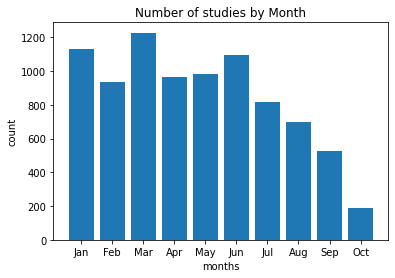

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(x, y)
plt.xlabel("months")
plt.ylabel("count")
plt.title('Number of studies by Month')